In [8]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_path = '/nas/cee-water/cjgleason/data/Riggs_gauges/'

In [3]:
gauges = gpd.read_file(os.path.join(data_path, 'gauges.shp'))

In [13]:
gauges

,Sttn_Nm,start,end,obs,missed,meanQ,added,kge,rbias,rrmse,nrmse,cal,val,distance,model,node_id,continent,a,b,geometry
0,001101A_BOM,1966.0,1990.0,7052,1511,40.522017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Oceania,NaN,NaN,POINT (139.59028 -24.78389)
1,001202A_BOM,1966.0,2021.0,13976,6090,10.575236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Oceania,NaN,NaN,POINT (139.91597 -22.91019)
2,001203A_BOM,1967.0,2021.0,13609,6093,32.733943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Oceania,NaN,NaN,POINT (138.84753 -22.51508)
3,001204A_BOM,1968.0,1988.0,7303,0,4.478748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Oceania,NaN,NaN,POINT (138.11453 -19.92323)
4,002101A_BOM,1949.0,1966.0,6021,186,34.164735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Oceania,NaN,NaN,POINT (139.37528 -25.90334)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45832,Y.33_RID,1990.0,1999.0,3562,0,70.469506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Asia,NaN,NaN,POINT (99.86444 17.16806)
45833,Y.3A_RID,1980.0,1999.0,6849,365,72.771085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Asia,NaN,NaN,POINT (99.82861 17.30806)
45834,Y.4_RID,1980.0,1997.0,3107,3377,56.027535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Asia,NaN,NaN,POINT (99.82528 17.005)
45835,Y.5_RID,1991.0,1997.0,2467,0,122.509189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Asia,NaN,NaN,POINT (100.26333 16.09306)


<Axes: >

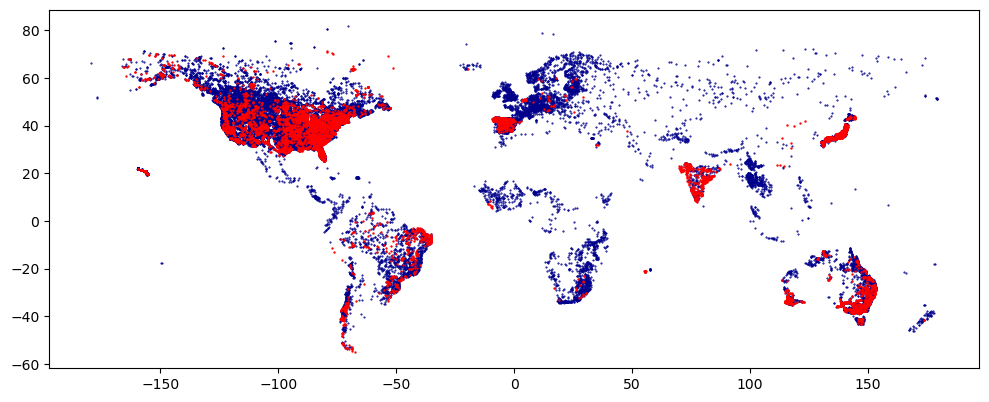

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
gauges[gauges['start'] < 1999].plot(markersize=0.25, ax=ax, color='darkblue')
gauges[gauges['start'] >= 1999].plot(markersize=0.5, ax=ax, color='red')

In [22]:
def getFiles(filepath):
    files = []
    for file in os.listdir(data_path):
        if not file.startswith('.') and not file.endswith('.zip'):
            files.append(os.path.join(data_path, file))
    return files

In [98]:
def filterFiles(files, date):
    
    files_aqua = []
    
    for file in files:
        # read in
        df = pd.read_csv(file).reset_index()
        # set correct column names, drop row 0
        df.columns = df.iloc[0]
        df = df.iloc[1:]
        # make date object
        df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
        filtered = df[df['date'] >= date]
        
        if filtered.shape[0] != 0:
            files_aqua.append(file)
        
    return files_aqua

In [100]:
files = getFiles(data_path)

In [ ]:
files_aqua = filterFiles(files=files, date='2002-07-04')

In [55]:
test.columns = test.iloc[0]

In [57]:
test = test.iloc[1:]

In [64]:
test

,Year,Month,Day,Discharge (m^3/s),date
1,1966,10,1,0,1966-10-01
2,1966,10,2,0,1966-10-02
3,1966,10,3,0,1966-10-03
4,1966,10,4,0,1966-10-04
5,1966,10,5,0,1966-10-05
...,...,...,...,...,...
13972,2021,9,3,0,2021-09-03
13973,2021,9,4,0,2021-09-04
13974,2021,9,5,0,2021-09-05
13975,2021,9,6,0,2021-09-06


In [67]:
test['date'] = pd.to_datetime(test[['Year', 'Month', 'Day']])

/tmp/ipykernel_3768475/3608695399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = pd.to_datetime(test[['Year', 'Month', 'Day']])


In [69]:
test[test['date'] >= '2002-07-04']

,Year,Month,Day,Discharge (m^3/s),date
8036,2005,6,3,0,2005-06-03
8037,2005,6,4,0,2005-06-04
8038,2005,6,5,0,2005-06-05
8039,2005,6,6,0,2005-06-06
8040,2005,6,7,0,2005-06-07
...,...,...,...,...,...
13972,2021,9,3,0,2021-09-03
13973,2021,9,4,0,2021-09-04
13974,2021,9,5,0,2021-09-05
13975,2021,9,6,0,2021-09-06


In [53]:
test.iloc[1:,0:3]

,index,Latitude: -22.910194,Longitude: 139.915972
1,1966,10,1
2,1966,10,2
3,1966,10,3
4,1966,10,4
5,1966,10,5
...,...,...,...
13972,2021,9,3
13973,2021,9,4
13974,2021,9,5
13975,2021,9,6


In [49]:
np.array(test['index'][1:].astype(int))

array([1966, 1966, 1966, ..., 2021, 2021, 2021])